### March 15th- 2019 Friday -- updated on 03-15
This file contains codes that:
1. get the business information of the 1000 restaurant in New York City -- from Yelp API-- saved in file `ny_rst`.
2. `scrape_review()` funtion to get the most recent 20 reviews for each restaurant.
3. `get_adj_and_adv()` function to get the adj and adv in the text 
4. `get_noun()` function to get the noun in the text
5. Use list comprehension to get reviews for all 1000 New York City restaurants.
6. codes revelent for plotting 


### 03-15 Friday:
GOAL:
Write the function to scrape the review and other attributes data from the yelp website. 
- City:New York 
- Number of reviews: 10000 -- 2.7 hours 10 reviews. 
- scrape what restaurant? Fine Dinning?
- How to get attributes
- links to script; 1000 from the API
- check whether there are duplicated urls. 

### Things to do on 03-16 Saturaday:
1. NLP on the review data: get topic(latened-dirichlet), words, positive vs negative 
2. try to scrape the attributes from web and review rating.
3. explore the random forest model, multinormial model, logistic model 
4. if have time, explore the monthly trend in New York City restaurant, menu required..

In [ ]:
import pandas as pd
import json
import numpy as np
import requests 
import requests_cache
import time
import lxml.html as lx

requests_cache.install_cache("yelp")

import plotnine
from plotnine import *

In [293]:
# code to get all the businesses
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")
    
# read the files: 
key = read_key("../Documents/yelp_api_2.txt")
headers = {'Authorization': 'Bearer %s' % key}
state = pd.read_csv("../Documents/state_file.csv")

In [119]:
# the function to get the data with imput location and number of results
def get_business(loc, num):
    df = pd.DataFrame()
    n = 0
    while n <= num: 
        headers = {'Authorization': 'Bearer %s' % key}
        url = " https://api.yelp.com/v3/businesses/search"
        try: 
            req = requests.get(url,  headers = headers, params = {
                         "term": "restaurants | food", 
                         "location": loc,
                         "limit": 50,
                         "offset": n})
            result = pd.DataFrame(req.json()["businesses"])
        except KeyError:
            break
        df = df.append(result, ignore_index = True)
        df["state"] = loc
        n += 50
        print(n)  
        print(loc)
    return (df)

In [528]:
# read a states file 
states_file  

# get all the data for 51 states 
all_state = [get_business(l,1000) for l in state["State"]]

# change from list to dataframe 
states = pd.DataFrame().append(all_state)

# write the data to a csv file
states.to_csv(r'../Documents/business_all_states.csv')

NameError: name 'get_business' is not defined

In [ ]:
# get the 1000 restaurant in New York City 
old_restaurant = pd.read_csv("business_all_states.csv")
ny_restaurant = old_restaurant[old_restaurant["state"] == "New York"]
ny_restaurant.to_csv(r'ny_rst') # this is the business for New York (updated: 3.15)


In [ ]:
def check_url(link):
    req = requests.get(link)
    time_fake = np.random.uniform(low=0.5, high=1.5)
    time.sleep(time_fake)
    x = 'The status code is {}'.format(req.status_code)
    print(time_fake)
    return x

# check all urls are valid, no 404 errors. 
result = [check_url(ny_url.iloc[i]) for i in range(len(ny_url))] # all valid 

In [ ]:
# code to scrapes
def scrape_review(url):
    
    time_fake = np.random.uniform(low=0.5, high=1.5)
    time.sleep(time_fake)
    
    # Download the page
    response = requests.get(url)
    response.raise_for_status()

    # Parse HTML
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)

    # get reviews
    links = html.xpath("//p[@lang  = 'en']")
    return [l.text_content().strip() for l in links]

[scrape_review(i) for i in ny_url]

In [ ]:
# after geting the reviews 

In [167]:
import nltk
import xlrd
import string
import nltk.corpus
from nltk.corpus import wordnet

from nltk.tokenize import word_tokenize

In [240]:
def get_adj_and_adv(text):
    text_lower = text.lower()
    text_token = word_tokenize(text_lower)
    result_tags = nltk.pos_tag(text_token)
    
    words = [(word) for word, tag in result_tags if tag in ('JJ','RB')]
    return (words)

In [248]:
def get_noun(text):
    text_lower = text.lower()
    text_token = word_tokenize(text_lower)
    result_tags = nltk.pos_tag(text_token)
    
    words = [(word) for word, tag in result_tags if tag in ('NN')]
    return (words)

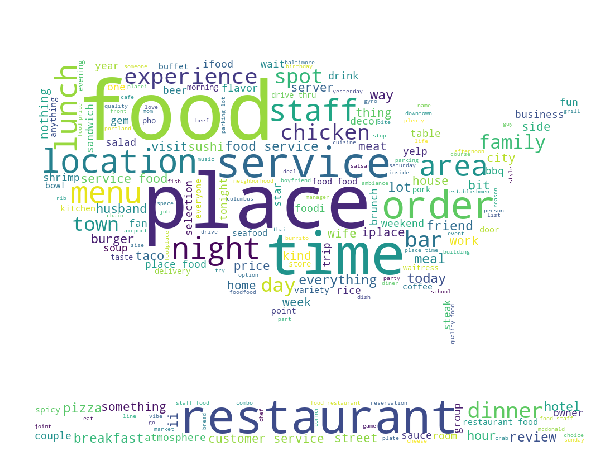

In [363]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image    # to import the image
 
# Create a list of word (https://en.wikipedia.org/wiki/Data_visualization)
text = ...
 
# Load the image 
wave_mask = np.array(Image.open("/Users/bckou/Documents/state_map.jpg"))
 
# Make the figure
wordcloud = WordCloud(background_color="white",mask=wave_mask).generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="nearest")
plt.axis("off")
plt.margins(x=100, y=100)

plt.show()

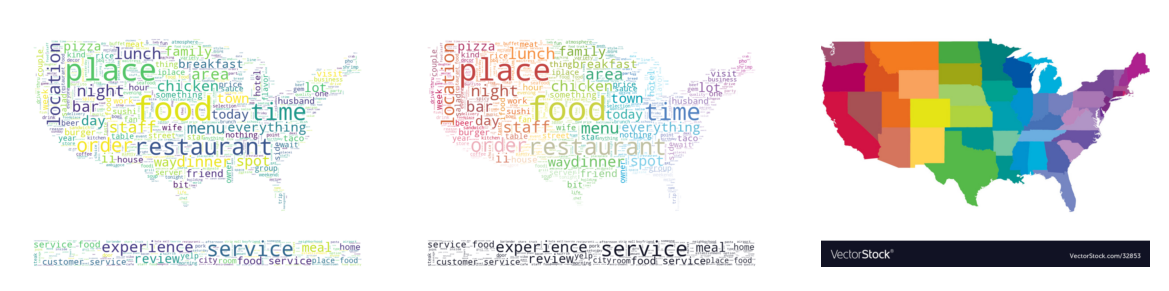

In [366]:
# plots related codes 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Read the whole text.
text = b

# read the mask / color image taken from
colored_state_map = np.array(Image.open("/Users/bckou/Documents/state_map.jpg"))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=colored_state_map,
               stopwords=stopwords, max_font_size=100, random_state=100)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(colored_state_map)

# show
#fig.figure(figsize = (20,20))
fig, axes = plt.subplots(1, 3,figsize = (20,20))
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
    
plt.show()

In [104]:
# codes that may be useful for NLP
all_none = review_total['noun']
a = [re.sub(r'[^\w\s]','',all_none[i]) for i in range(len(all_none))]
b = ''.join(a)
concat_list = [w for w in concat_list if w  not in exclude_2 ]

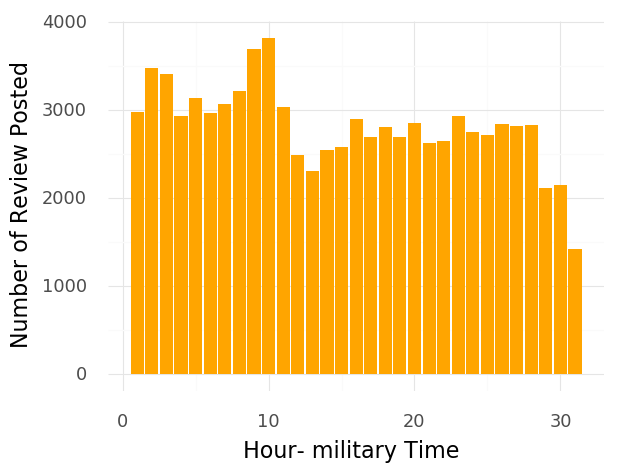

<ggplot: (-9223372029266114458)>

In [286]:
from datetime import datetime

# '2019-03-10 13:23:45'
review_year = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year for x in review_total["time_created"]]
review_month = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month for x in review_total["time_created"]]
review_day = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day for x in review_total["time_created"]]
review_hour = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour for x in review_total["time_created"]]

review_total["review hour"] = review_hour
review_total["review day"] = review_day
review_total["review year"] = review_year


((ggplot(review_total)+
 geom_bar(aes(x = "review day"), fill = "orange")+
 labs( main = "Distribution of Time Reviews are Posted on Yelp",
     x = " Hour- military Time", y = "Number of Review Posted"))+ theme_minimal(base_size = 16))

#labels = as.character(ID), breaks = ID
#scale_y_continuous(name="Stopping distance", limits=c(0, 150))

In [ ]:
# GMAP is not free!!!
import gmaps
locations = old_cor[['latitude', 'longitude']]
fig = gmaps.figure(map_type='HYBRID')
heatmap_layer =gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

In [ ]:
# plotly - use with cautions
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

plotly.tools.set_credentials_file(username='jiamanwu', api_key='p4nUcYhj9mdohVZJqdcl')

#df = pd.read_csv("Dataframe2.csv")
small_df = df3[ df3["Cat"].isin(["American", "sushi", "mexican", "chinese"]) ]



cats = ["American", "sushi", "mexican", "chinese"]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)"]

cities = []
#scale = 5000

for i in range(len(cats)):
    cat = cats[i]
    city = go.Scattergeo(
        lon = small_df[small_df["Cat"] == cat]["longitude"],
        lat = small_df[ small_df["Cat"] == cat ]['latitude'],
        text = small_df[ small_df["Cat"] == cat ]['rating'],
        marker = go.scattergeo.Marker(
                size = small_df["size"],
                color = colors[i],
                line = go.scattergeo.marker.Line(
                    width=0.5, color='rgb(40,40,40)'
                ),
                sizemode = 'area'
            ),
            name = cat)
    cities.append(city)

    
layout = go.Layout(
        title = go.layout.Title(
            text = 'Yelp Restaurants Distribution Weighted by Ratings'
        ),
        showlegend = True,
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )  


fig = go.Figure(data=cities, layout=layout)
py.iplot(fig, filename='rating map')

In [533]:
pwd

'/Users/bckou/STA_141B'